In [519]:
import h5py
import numpy as np
import math
from matplotlib import patches
from scipy.integrate import simps
import matplotlib.pylab as plt
from utilities import visang, files

In [585]:
fil = h5py.File("/home/mjszul/BrainDyn Dropbox/Maciek Szul/explicit_implicit_beta/data/sub-101/ses-01/behaviour/block_5.mat", "r")

In [506]:
fil.keys()

<KeysViewHDF5 ['#refs#', 'display', 'fixation', 'rdk', 'run_data', 'run_params', 'targets']>

In [4]:
level1 = {k: list(fil[k].keys()) for k in fil.keys() if k not in "#refs#"}

In [5]:
level1

{'display': ['black',
  'blue',
  'darkgrey',
  'dist',
  'green',
  'grey',
  'height',
  'ifi',
  'red',
  'resolution',
  'white',
  'width',
  'winPtr'],
 'fixation': ['params'],
 'rdk': ['coh_dots', 'incoh_dots', 'params'],
 'run_data': ['actual_dur',
  'coherence_levels',
  'correct',
  'exp_start',
  'exp_stop',
  'reach_dur',
  'reach_rt',
  'trajectory',
  'trial_coherence',
  'trial_delay_dur',
  'trial_directions',
  'trial_fix_dur',
  'trial_iti_dur',
  'trial_perturb',
  'trial_target',
  'trial_time_idx',
  'vis_trajectory'],
 'run_params': ['CCW',
  'CW',
  'block',
  'del_dur_max',
  'del_dur_min',
  'feedback_dur_max',
  'final_feedback_dur_max',
  'fix_dur_max',
  'fix_dur_min',
  'group',
  'home_thresh',
  'iti_dur_max',
  'iti_dur_min',
  'n_trials',
  'rdk_dur_max',
  'reach_dur_max',
  'session',
  'subj_id',
  'trial_type'],
 'targets': ['cursor_size',
  'n_targets',
  'perturbation_mag',
  'positions',
  'radius',
  'size']}

### DATA EXTRACTION

In [11]:
# resolution
np.array(fil["display"]["resolution"]).flatten()

array([1920., 1080.])

In [12]:
np.array(fil["display"]["winPtr"]).flatten()

array([10.])

In [13]:
np.array(fil["display"]["dist"]).flatten()

array([80.])

In [14]:
np.array(fil["display"]["width"]).flatten()

array([43.])

In [15]:
np.array(fil["display"]["height"]).flatten()

array([32.])

In [16]:
np.array(fil["run_data"]["exp_start"]).flatten()

array([ 50,  49,  45,  83, 101, 112,  45,  50,  48,  50,  48,  32,  49,
        53,  58,  49,  48,  58,  53,  49], dtype=uint16)

In [17]:
np.array(fil["run_data"]["exp_stop"]).flatten()

array([ 50,  49,  45,  83, 101, 112,  45,  50,  48,  50,  48,  32,  49,
        53,  58,  49,  57,  58,  53,  50], dtype=uint16)

In [18]:
# is response correct
np.array(fil["run_data"]["correct"])

array([[1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0.]])

In [19]:
np.array(fil["run_data"]["reach_dur"])

array([[0.08338515, 0.04165801, 0.07503972, 0.08338968, 0.06665234,
        0.08331633, 0.08334833, 0.05834615, 0.0499811 , 0.0833761 ,
        0.09169828, 0.05001702, 0.03334247, 0.04163869, 0.03333945,
        0.08333203, 0.05000374, 0.07501527, 0.06668705,        inf,
        0.07504637, 0.04167945, 0.07502524, 0.04169363, 0.05001702,
        0.05831204, 0.12509478, 0.07502433,        nan, 0.07502614,
        0.05001552, 0.05001401, 0.05837   , 0.09170371, 0.04167763,
        0.11667359, 0.04167975, 0.04163326, 0.05005536, 0.03334368,
        0.05839415, 0.10837555, 0.07506267, 0.06669007, 0.07504757,
        0.04170058, 0.05001491, 0.07500109, 0.06665596, 0.04998261,
               nan, 0.0250067 , 0.05829182,        nan, 0.04166707,
        0.10838551]])

In [20]:
np.array(fil["run_data"]["reach_rt"])

array([[0.54987817, 0.44175437, 0.47512581, 0.65852419, 0.4168017 ,
        0.42516433, 0.4334515 , 0.43344607, 0.40846412, 0.41677966,
        0.30841558, 0.35011555, 0.55014954, 0.50016904, 0.44179391,
        0.35845283, 0.35845736, 0.46678371, 0.56679783, 0.75852926,
        0.42501884, 0.43343007, 0.44179481, 0.43345874, 0.5001467 ,
        0.3750809 , 0.51678443, 0.48347547,        nan, 0.40011326,
        0.3750815 , 0.51681975, 0.72521939, 0.3500754 , 0.41678962,
        0.55850734, 0.4834649 , 0.37512738, 0.54180381, 0.43346388,
        0.5168279 , 0.5418029 , 0.46677707, 0.60017381, 0.50849907,
        0.50013161, 0.44183587, 0.48347849, 0.45851435, 0.44183013,
               nan, 0.35009382, 0.64190698,        nan, 0.49181637,
        0.35840272]])

In [139]:
# x,y,t x 300000 x trials
np.array(fil["run_data"]["trajectory"])[:,:,0].shape

(3, 300000)

In [22]:
np.array(fil["run_data"]["trial_coherence"]).flatten()

array([0.        , 0.        , 0.29230122, 0.43845183, 0.29230122,
       0.43845183, 0.        , 0.58460243, 0.29230122, 0.43845183,
       0.        , 0.43845183, 0.58460243, 0.58460243, 0.43845183,
       0.29230122, 0.43845183, 0.43845183, 0.29230122, 0.43845183,
       0.58460243, 0.58460243, 0.58460243, 0.29230122, 0.43845183,
       0.58460243, 0.58460243, 0.29230122, 0.        , 0.        ,
       0.29230122, 0.29230122, 0.58460243, 0.58460243, 0.43845183,
       0.58460243, 0.43845183, 0.58460243, 0.43845183, 0.        ,
       0.58460243, 0.29230122, 0.58460243, 0.58460243, 0.29230122,
       0.29230122, 0.43845183, 0.29230122, 0.29230122, 0.43845183,
       0.        , 0.58460243, 0.43845183, 0.29230122, 0.29230122,
       0.43845183])

In [23]:
np.array(fil["run_data"]["trial_coherence"]).flatten()

array([0.        , 0.        , 0.29230122, 0.43845183, 0.29230122,
       0.43845183, 0.        , 0.58460243, 0.29230122, 0.43845183,
       0.        , 0.43845183, 0.58460243, 0.58460243, 0.43845183,
       0.29230122, 0.43845183, 0.43845183, 0.29230122, 0.43845183,
       0.58460243, 0.58460243, 0.58460243, 0.29230122, 0.43845183,
       0.58460243, 0.58460243, 0.29230122, 0.        , 0.        ,
       0.29230122, 0.29230122, 0.58460243, 0.58460243, 0.43845183,
       0.58460243, 0.43845183, 0.58460243, 0.43845183, 0.        ,
       0.58460243, 0.29230122, 0.58460243, 0.58460243, 0.29230122,
       0.29230122, 0.43845183, 0.29230122, 0.29230122, 0.43845183,
       0.        , 0.58460243, 0.43845183, 0.29230122, 0.29230122,
       0.43845183])

In [24]:
np.array(fil["run_data"]["trial_directions"]).flatten()

array([ 0.,  0.,  1.,  1., -1., -1.,  0., -1., -1., -1.,  0., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  0.,  0.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  0., -1.,
        1., -1.,  1.,  1.])

In [25]:
np.array(fil["run_data"]["trial_fix_dur"]).flatten()

array([1.29178373, 1.32871343, 1.528748  , 1.40463055, 1.74668398,
       1.625112  , 1.71831178, 1.39512752, 1.74047989, 1.88492202,
       1.11043702, 1.36531796, 1.4623388 , 1.89084053, 1.40700792,
       1.1214708 , 1.34747989, 1.01063986, 1.66557119, 1.70821741,
       1.21406984, 1.85913143, 1.88148062, 1.46709321, 1.00115009,
       1.6240707 , 1.14266327, 1.83513718, 1.19554994, 1.00773612,
       1.58111554, 1.00179244, 1.95268869, 1.97019276, 1.80389909,
       1.62684169, 1.81892941, 1.56636531, 1.0833237 , 1.56110813,
       1.73099115, 1.12178278, 1.39315051, 1.58408767, 1.2577789 ,
       1.33073905, 1.59087638, 1.45009975, 1.02688068, 1.0994775 ,
       1.3069628 , 1.26547431, 1.72682806, 1.95389961, 1.1862906 ,
       1.47774106])

In [26]:
np.array(fil["run_data"]["trial_iti_dur"]).flatten()

array([1.73576637, 1.87831278, 1.71349522, 1.76173385, 1.72371458,
       1.50573204, 1.92638062, 1.81478966, 1.69349327, 1.86146806,
       1.94240461, 1.8597495 , 1.78308879, 1.83177385, 1.87065788,
       1.79747903, 1.83689396, 1.94775749, 1.64674605, 1.86204012,
       1.51561221, 1.71154218, 1.78566658, 1.76352608, 1.99015986,
       1.86572536, 1.65165187, 1.79228958, 1.72706395, 1.6172568 ,
       1.69275718, 1.55617742, 1.95778195, 1.76063203, 1.60860241,
       1.66299007, 1.7500494 , 1.95503034, 1.50267626, 1.55057765,
       1.69550045, 1.67511483, 1.52758295, 1.55297044, 1.74632024,
       1.78316649, 1.86272547, 1.73640673, 1.58930673, 1.86195307,
       1.99124078, 1.65378686, 1.99687766, 1.69678779, 1.84418535,
       1.90213365])

In [27]:
np.array(fil["run_data"]["trial_perturb"]).flatten()

array([ 0.        ,  0.        ,  0.52359878,  0.52359878, -0.52359878,
       -0.52359878,  0.        , -0.52359878, -0.52359878, -0.52359878,
        0.        , -0.52359878,  0.52359878, -0.52359878,  0.52359878,
        0.52359878, -0.52359878, -0.52359878, -0.52359878, -0.52359878,
       -0.52359878,  0.52359878, -0.52359878, -0.52359878,  0.52359878,
        0.52359878, -0.52359878, -0.52359878,  0.        ,  0.        ,
        0.52359878, -0.52359878,  0.52359878,  0.52359878, -0.52359878,
       -0.52359878, -0.52359878, -0.52359878,  0.52359878,  0.        ,
        0.52359878,  0.52359878,  0.52359878,  0.52359878,  0.52359878,
        0.52359878,  0.52359878, -0.52359878,  0.52359878,  0.52359878,
        0.        , -0.52359878,  0.52359878, -0.52359878,  0.52359878,
        0.52359878])

In [28]:
np.array(fil["run_data"]["trial_target"]).flatten() -1

array([3., 1., 2., 3., 1., 1., 2., 2., 3., 2., 2., 2., 2., 3., 1., 3., 3.,
       1., 2., 1., 2., 3., 2., 2., 1., 1., 1., 1., 3., 2., 1., 1., 3., 2.,
       3., 1., 3., 3., 1., 1., 2., 2., 3., 1., 1., 3., 3., 2., 2., 3., 3.,
       3., 2., 3., 1., 2.])

In [29]:
np.array(fil["run_data"]["trial_time_idx"]).flatten() -1

array([ 77.,  59.,  67.,  90.,  59.,  62.,  63.,  60.,  56.,  61.,  49.,
        49.,  71.,  66.,  58.,  54.,  50.,  66.,  77., 121.,  61.,  58.,
        63.,  58.,  67.,  53.,  78.,  68.,  -1.,  58.,  52.,  69.,  95.,
        54.,  56.,  82.,  64.,  51.,  72.,  57.,  70.,  79.,  66.,  81.,
        71.,  66.,  60.,  68.,  64.,  60.,  -1.,  46.,  85.,  -1.,  65.,
        57.])

In [30]:
np.array(fil["run_params"]["CW"]).flatten()

array([1.])

In [31]:
np.array(fil["run_params"]["CCW"]).flatten()

array([-1.])

In [32]:
np.array(fil["run_params"]["block"]).flatten()

array([6.])

In [33]:
np.array(fil["run_params"]["del_dur_max"]).flatten()

array([1.])

In [34]:
np.array(fil["run_params"]["del_dur_min"]).flatten()

array([0.5])

In [35]:
np.array(fil["run_params"]["group"]).flatten()

array([1.])

In [36]:
np.array(fil["run_params"]["home_thresh"]).flatten()

array([1.])

In [37]:
np.array(fil["run_params"]["iti_dur_max"]).flatten()

array([2.])

In [38]:
np.array(fil["run_params"]["iti_dur_min"]).flatten()

array([1.5])

In [39]:
np.array(fil["run_params"]["n_trials"]).flatten()

array([56.])

In [40]:
np.array(fil["run_params"]["rdk_dur_max"]).flatten()

array([2.])

In [41]:
np.array(fil["run_params"]["session"]).flatten()

array([1.])

In [545]:
np.array(fil["run_params"]["subj_id"]).flatten().astype(int)[0]

101

In [43]:
np.array(fil["run_params"]["trial_type"]).flatten()

array([1.])

In [44]:
np.array(fil["targets"]["n_targets"]).flatten()

array([3.])

In [298]:

print(w_px, h_px)

1920 1080


In [259]:
def cart2pol(x, y):
    radius = np.sqrt(x**2 + y**2)
    angle = np.arctan2(y, x)
    return [radius, angle]

def pol2cart(radius, angle):
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    return [x, y]

(-55.0, 55.0)

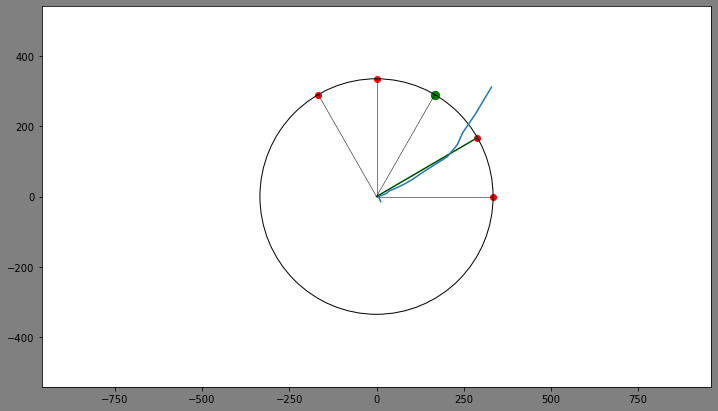

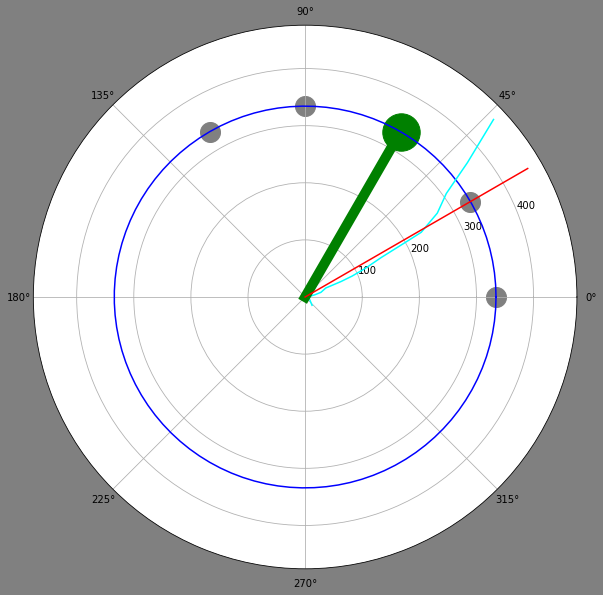

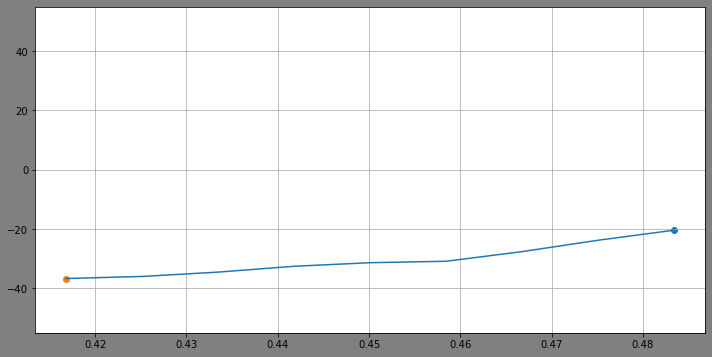

In [586]:
w_px, h_px = np.array(fil["display"]["resolution"]).flatten().astype(int)
w_cm = np.array(fil["display"]["width"]).flatten().astype(int)[0]
h_cm = np.array(fil["display"]["height"]).flatten().astype(int)[0]
d_cm = np.array(fil["display"]["dist"]).flatten().astype(int)[0]
va = visang.VisualAngle(w_px, h_px, w_cm, h_cm, d_cm)

index = 53

time_ix = int(np.array(fil["run_data"]["trial_time_idx"]).flatten()[index]) -1
x = np.array(fil["run_data"]["trajectory"])[0,:,index][:time_ix]
y = -np.array(fil["run_data"]["trajectory"])[1,:,index][:time_ix]
t = np.array(fil["run_data"]["trajectory"])[2,:,index][:time_ix]

xy = zip(x, y)
radius, angle = zip(*[cart2pol(p[0], p[1]) for p in xy])

targets = list(zip(np.array(fil["targets"]["positions"])[1], np.array(fil["targets"]["positions"])[0]))
trial_target = int(np.array(fil["run_data"]["trial_target"]).flatten()[index] -1)

perturb_rad = np.array(fil["run_data"]["trial_perturb"]).flatten()[index]
perturb_angle = targets[trial_target][1] - perturb_rad # + or - ???
perturb_cart = pol2cart(targets[0][0]*va.degPix(), perturb_angle)

targets_cart = [pol2cart(i[0]*va.degPix(), i[1]) for i in targets]
targets_cart = np.array(targets_cart)


f, ax = plt.subplots(figsize=(12,7))
f.patch.set_facecolor('gray')
circle = patches.Circle([0,0], radius=targets_cart[-1][0], edgecolor="black", fill=False)
ax.add_patch(circle)
ax.scatter(targets_cart[:,0], -targets_cart[:,1], c="r") # all targets + neg y axis?
ax.scatter(targets_cart[trial_target,0], -targets_cart[trial_target,1], c="g", s=70) # trial target

ax.plot([0, perturb_cart[0]], [0, -perturb_cart[1]], c="green", lw=1.5)

[ax.plot([0, i[0]], [0, -i[1]], c="black", lw=0.5) for i in targets_cart] # ideal responses for each target
ax.plot(x, y) # trajectory
plt.xlim(-(1920/2), (1920/2))
plt.ylim(-(1080/2), (1080/2))


targets_arr = np.array(targets)
target_radius = targets_arr[:,0][trial_target]*va.degPix()
target_angle = np.abs(targets_arr[:,1][trial_target])
f = plt.figure(figsize=(10,10))
f.patch.set_facecolor('gray')
ax = plt.subplot(111, projection='polar')
ax.plot(np.linspace(0, 2*np.pi, 100), np.full(100, target_radius), c="blue")
ax.plot(angle, radius, c="cyan")
ax.scatter(np.abs(targets_arr[:,1]), targets_arr[:,0]*va.degPix(), c="gray", s=400)
ax.scatter(target_angle, target_radius, c="green", s=1400)
ax.plot([0, target_angle], [0, target_radius-30], c="green",lw=10)

ax.plot([0, -perturb_angle], [0, 450], c="red", lw=1.5)
f, ax = plt.subplots(figsize=(12,6))
f.patch.set_facecolor('gray')

dev_from_t = np.rad2deg(np.abs(angle) - target_angle)
targ_cross = np.min(np.where(radius > target_radius))
fiddypx_cross = np.min(np.where(radius > np.array(50)))

ax.plot((t/1000)[fiddypx_cross:targ_cross+1], dev_from_t[fiddypx_cross:targ_cross+1])
plt.grid()
ax.scatter((t/1000)[targ_cross], dev_from_t[targ_cross])
ax.scatter((t/1000)[fiddypx_cross], dev_from_t[fiddypx_cross])
plt.ylim(-55,55)

In [584]:
print("total auc", simps(np.abs(dev_from_t[fiddypx_cross:targ_cross+1])))
print("bottomed auc", simps(np.abs(dev_from_t[fiddypx_cross:targ_cross+1]) - np.min(np.abs(dev_from_t[fiddypx_cross:targ_cross+1]))))
print("avg angle from the target", np.mean(dev_from_t[fiddypx_cross:targ_cross+1]))
print("trial_direction", np.array(fil["run_data"]["trial_directions"]).flatten().astype(int)[index])
print("trial_target", np.array(fil["run_data"]["trial_target"]).flatten().astype(int)[index])
print("aim_target", dev_from_t[fiddypx_cross])
print("final_target", dev_from_t[targ_cross])
print("subject", np.array(fil["run_params"]["subj_id"]).flatten().astype(int)[0])
print("group", np.array(fil["run_params"]["group"]).flatten().astype(int)[0])
print("block", np.array(fil["run_params"]["block"]).flatten().astype(int)[0])
print("reach_dur", np.array(fil["run_data"]["reach_dur"]).flatten()[index])
print("reach_rt", np.array(fil["run_data"]["reach_rt"]).flatten()[index])
print("trial_coherence", "add label 0 lo med hi for coherence", np.array(fil["run_data"]["trial_coherence"]).flatten()[index])
print("trial_perturb", np.array(fil["run_data"]["trial_perturb"]).flatten()[index])
print("trial_type", np.array(fil["run_params"]["trial_type"]).flatten().astype(int)[0])
print("")
# print("block", 

total auc 104.27052559214633
bottomed auc 27.660152647761922
avg angle from the target 20.674413328192284
trial_direction 1
trial_target 3
aim_target 15.322074588876884
final_target 24.558864504163143
subject 101
group 1
block 3
reach_dur 0.04167703038547188
reach_rt 0.45847902935929596
trial_coherence add label 0 lo med hi for coherence 0.5846024344421291
trial_perturb 0.5235987755982988
trial_type 1



In [564]:
np.array(fil["run_params"]["trial_type"])

array([[1.]])